<a href="https://colab.research.google.com/github/gabrielfea/supermarket_gps/blob/main/supermarket_gps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GPS_SUPERMARKET - PROTÓTIPO

##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!pip install -q -U google-generativeai

### Import packages

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [39]:
# Used to securely store your API key
from google.colab import userdata

In [40]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY-L6Y')

genai.configure(api_key=GOOGLE_API_KEY)

In [41]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

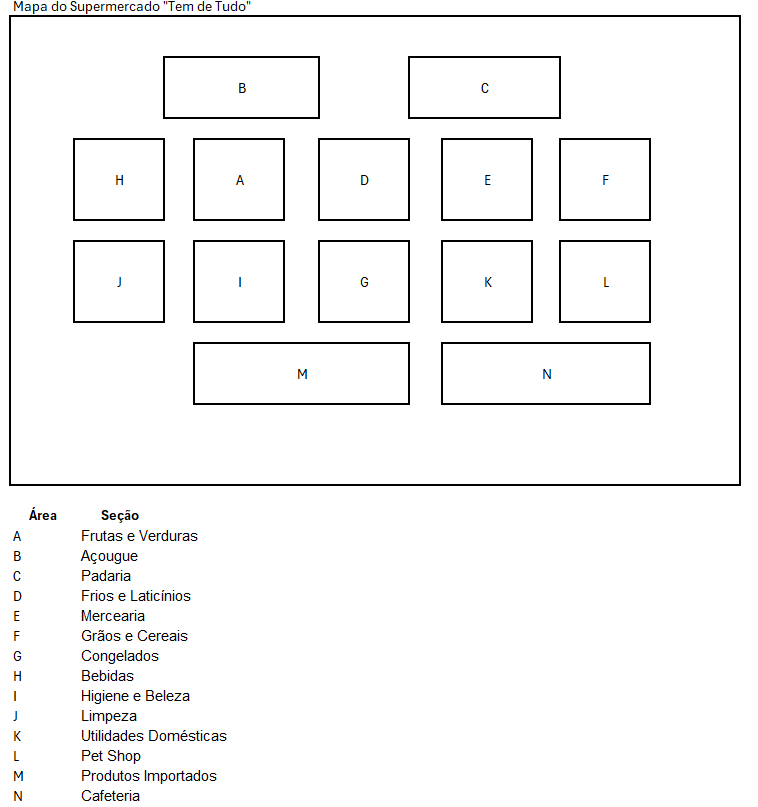

In [42]:
import PIL.Image

img = PIL.Image.open('mapa_mercado.png')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [43]:
model = genai.GenerativeModel('gemini-pro-vision')

In [44]:
response = model.generate_content(img)

to_markdown(response.text)

>  **Mapa do supermercado "Tem de Tudo"**
> 
> O supermercado "Tem de Tudo" é dividido em 14 seções, dispostas da seguinte forma:
> 
> * **Seção A:** frutas e verduras
> * **Seção B:** açougue
> * **Seção C:** padaria
> * **Seção D:** frios e laticínios
> * **Seção E:** mercearia
> * **Seção F:** grãos e cereais
> * **Seção G:** congelados
> * **Seção H:** bebidas
> * **Seção I:** higiene e beleza
> * **Seção J:** limpeza
> * **Seção K:** utilidades domésticas
> * **Seção L:** pet shop
> * **Seção M:** produtos importados
> * **Seção N:** cafeteria

To provide both text and images in a prompt, pass a list containing the strings and images:

In [46]:
instrucoes = "Baseado na imagem em anexo que representa o mapa de um mercado, me sugira o melhor caminho para eu fazer minhas compras, sem andar muito, sabendo a lista de compras que irei passar em seguida."
lista = "Preciso comprar tomate, batata , alface, cebola, picanha, carvão, ração para a Naja, acendedor de churrasqueira, sal grosso, cerveja, e refrigerante."
query = instrucoes+lista
response = model.generate_content([instrucoes+lista, img], stream=False)
response.resolve()
to_markdown(response.text)

>  O melhor caminho a ser percorrido é:
> 1. Comece na seção de frutas e verduras (região A), onde você pode comprar o tomate, a batata, a alface e a cebola;
> 2. Em seguida, vá para a seção de carnes (região D), onde você pode comprar a picanha e o carvão;
> 3. Depois, vá para a seção de pet shop (região N), onde você pode comprar a ração para a Naja;
> 4. Em seguida, vá para a seção de utilidades domésticas (região J), onde você pode comprar o acendedor de churrasqueira e o sal grosso;
> 5. Depois, vá para a seção de bebidas (região H), onde você pode comprar a cerveja e o refrigerante;
> 6. Por fim, vá para o caixa para pagar suas compras.